In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("housing.csv")

Housing variable taken as df

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


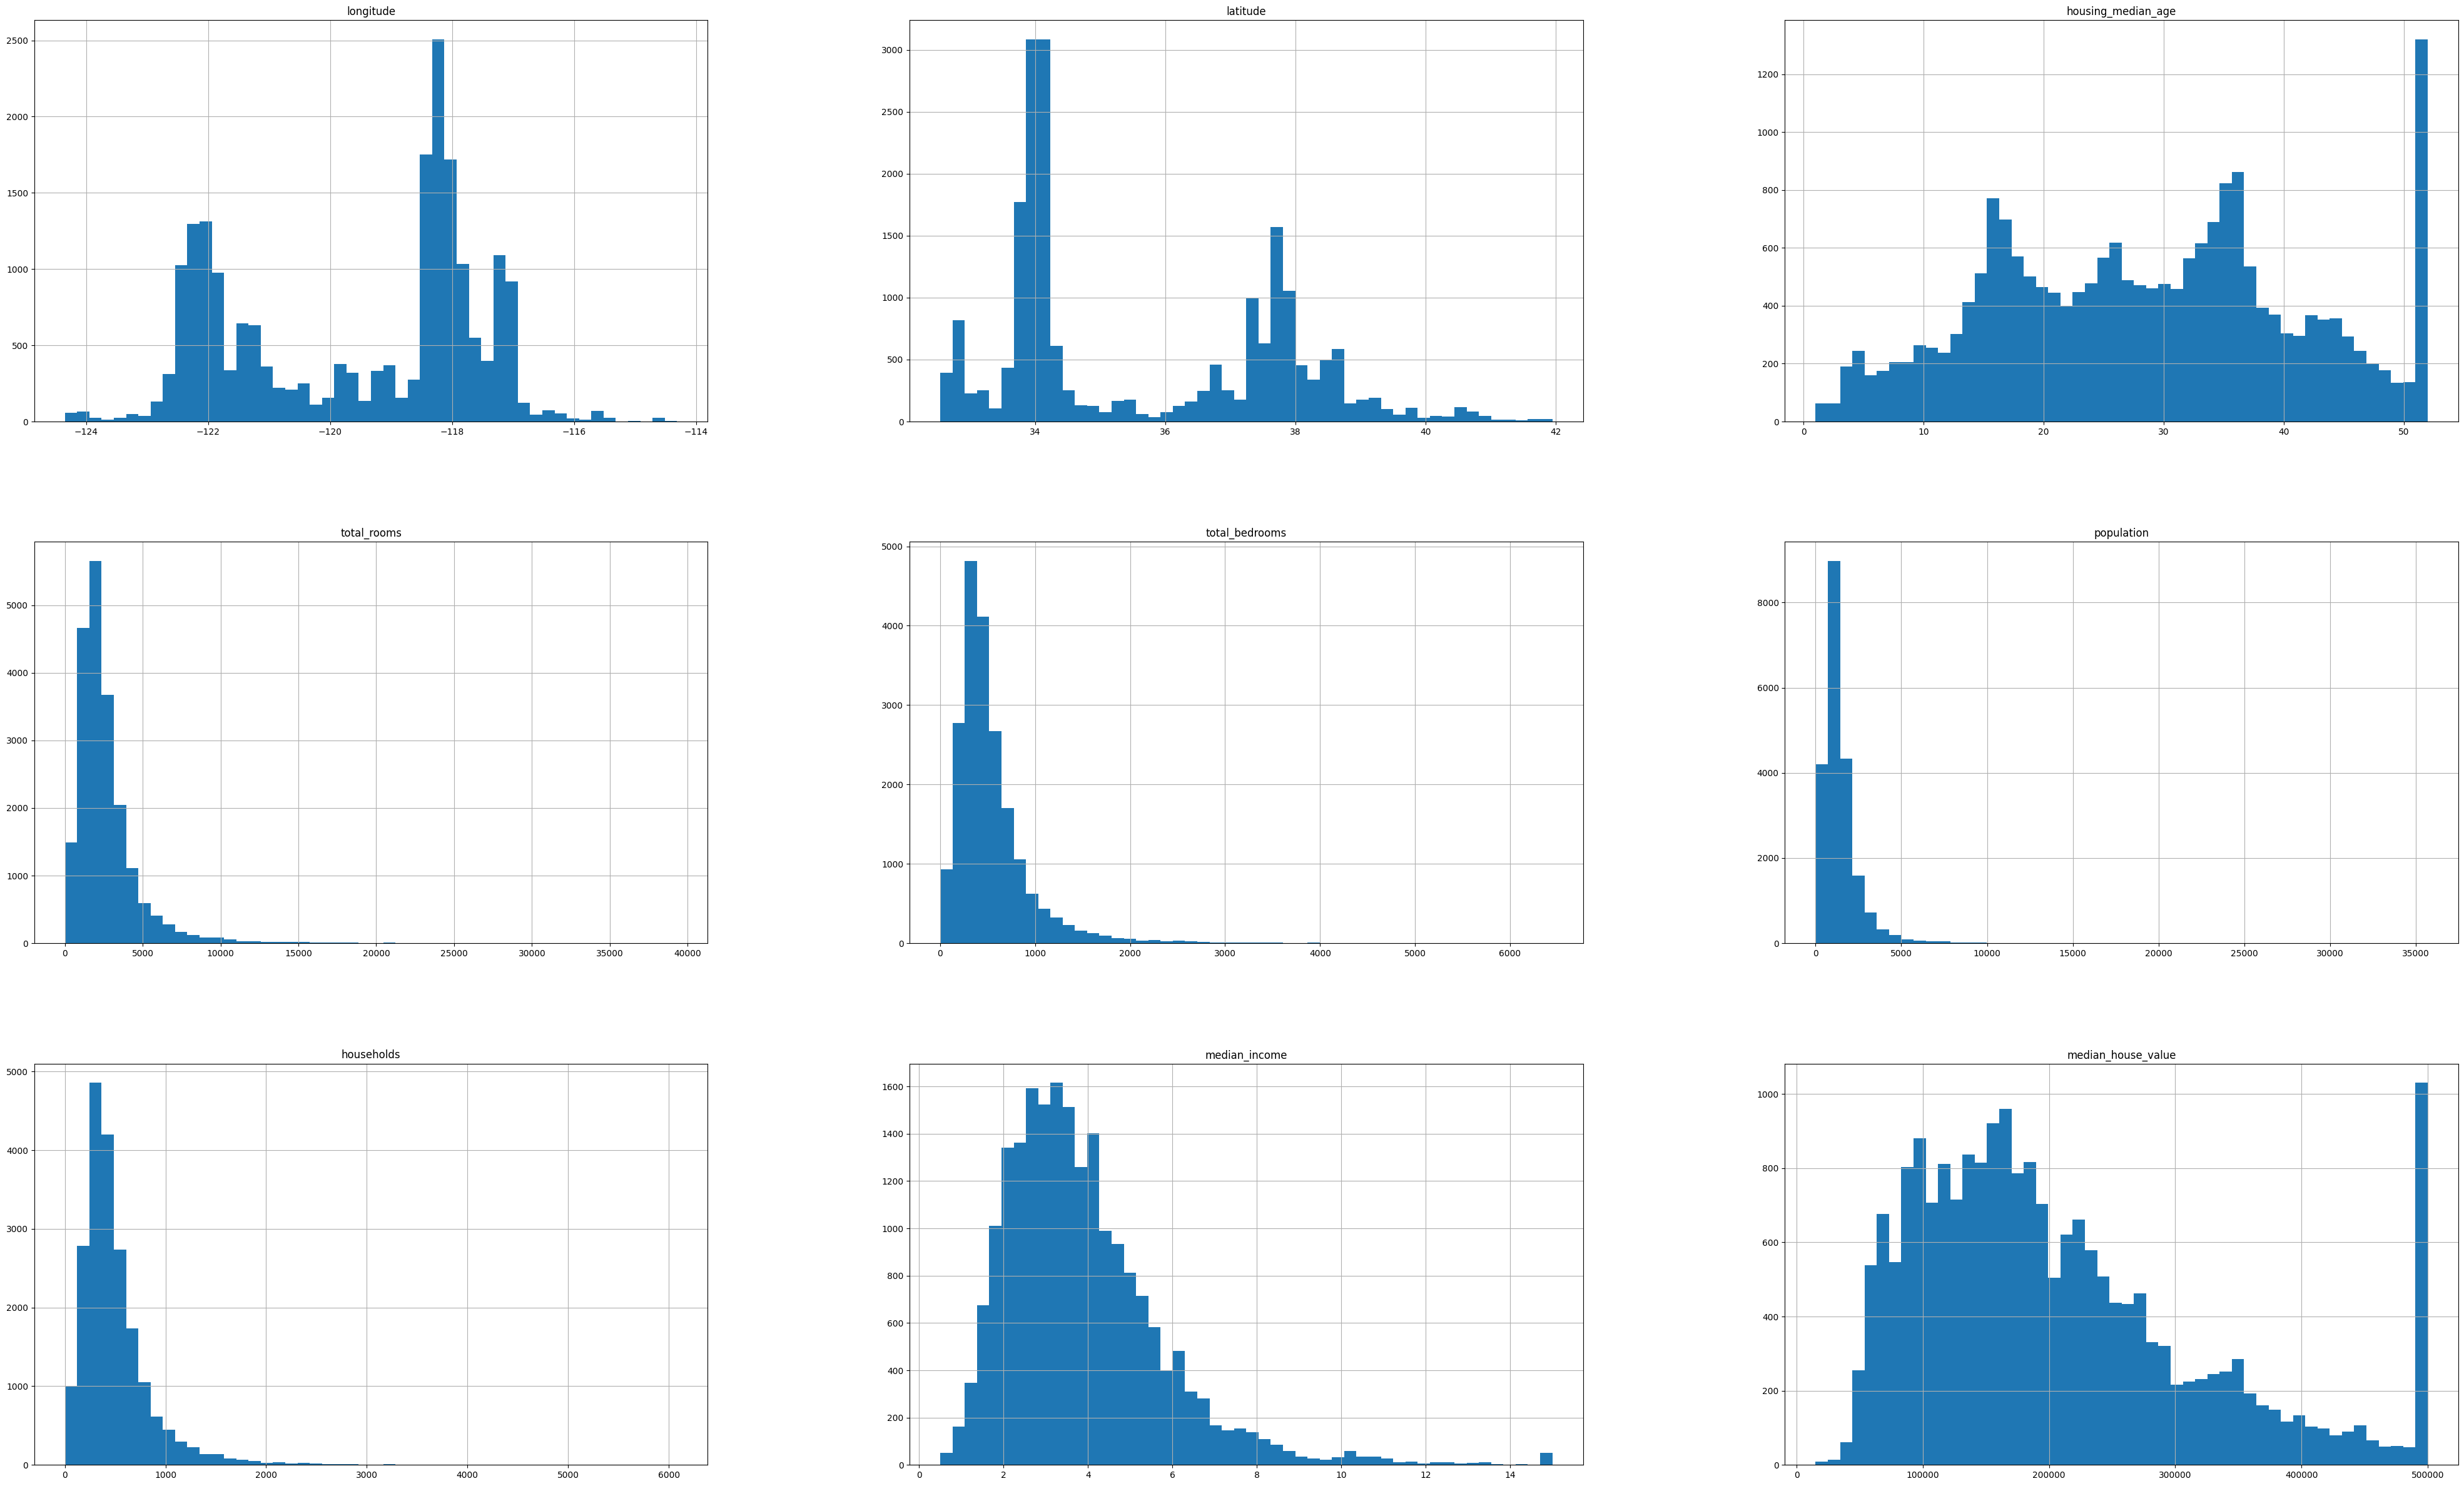

In [22]:
import matplotlib.pyplot as plt
df.hist(figsize=(50,30), bins=50)
plt.show()

In [28]:
import numpy as np
def split_data(data, test_ratio, seed = 42):
    random_seed = np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
train_set, test_set = split_data(df, 0.2)

In [30]:
print("Train Set:", len(train_set) , " \t" , "Test Set:", len(test_set))

Train Set: 16512  	 Test Set: 4128


Purely Random Sampling method

In [31]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [32]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [33]:
df_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [35]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [36]:
df_with_id["id"] = df["longitude"] * 1000 + df["latitude"]

In [37]:
df_with_id.id.head()

0   -122192.12
1   -122182.14
2   -122202.15
3   -122212.15
4   -122212.15
Name: id, dtype: float64

In [38]:
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "id")

In [39]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [43]:
df_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [47]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [48]:
len(train_set)

16512

In [50]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


<Axes: >

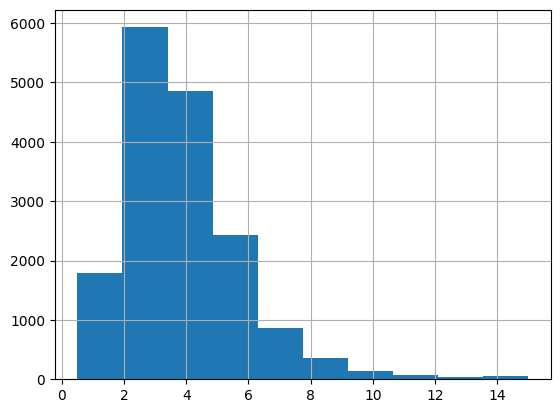

In [51]:
train_set.median_income.hist()

<Axes: >

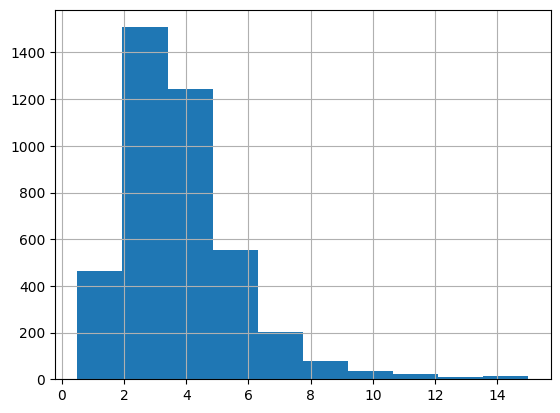

In [52]:
test_set.median_income.hist()

Dividing the median income into categories
creating an income category attribute by dividing the median income by 1.5(to limit the number of income categories), and rounding up ceil(to have discrete categories), then merging all the categories greater than 5 into category 5

In [56]:
df["income_cat"] = np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"] <5, 5.0, inplace = True)

<Axes: >

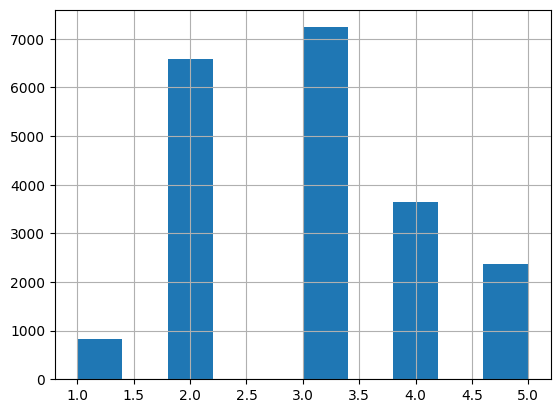

In [58]:
df.income_cat.hist()

In [59]:
df.income_cat.head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [61]:
df.income_cat.value_counts()/len(df)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

Stratified Sampling on income category

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [64]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3.0


In [71]:
df["income_cat"].value_counts()/len(df)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

Data back to it's original state

In [72]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

Visualizing and discovering graphs
first to creating a copy of the dataFrame

In [88]:
df = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

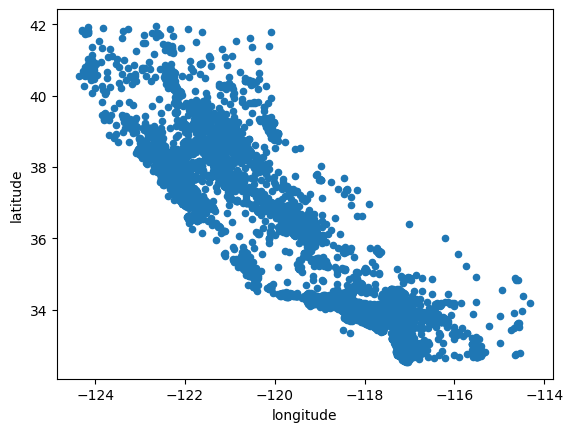

In [89]:
df.plot(kind="scatter", x="longitude", y="latitude")

This visualization would help finding out housing geographic locations with latitude and longitude in y to x axis respectively

To visualize patters where there is high density of datapoints

<Axes: xlabel='longitude', ylabel='latitude'>

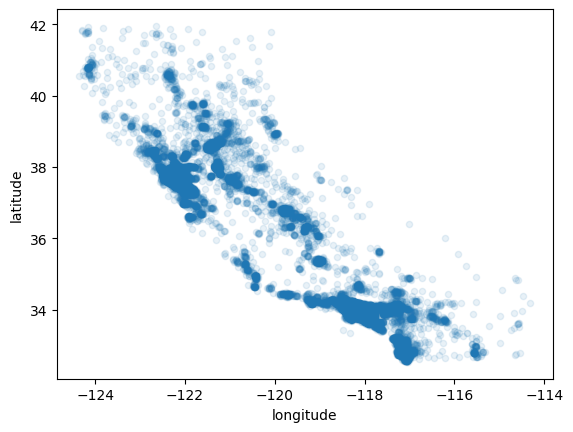

In [90]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Digging deeper into finding out patterns for this graph

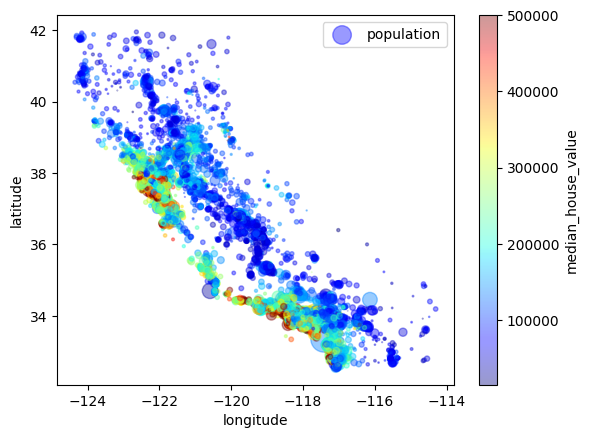

In [91]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df_copy["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Housing prices are very much related to the location, being close/far from the bay, and to the population density

In [95]:
corr_matrix = df_copy.corr()

In [96]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [94]:
df_copy = df.drop(['ocean_proximity'], axis=1)

In [100]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

A Standard correlation between every pair of attributes ranges between -1 to 1. Close to 1 means a strong co-relation, close to -1 strong negative correlation

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

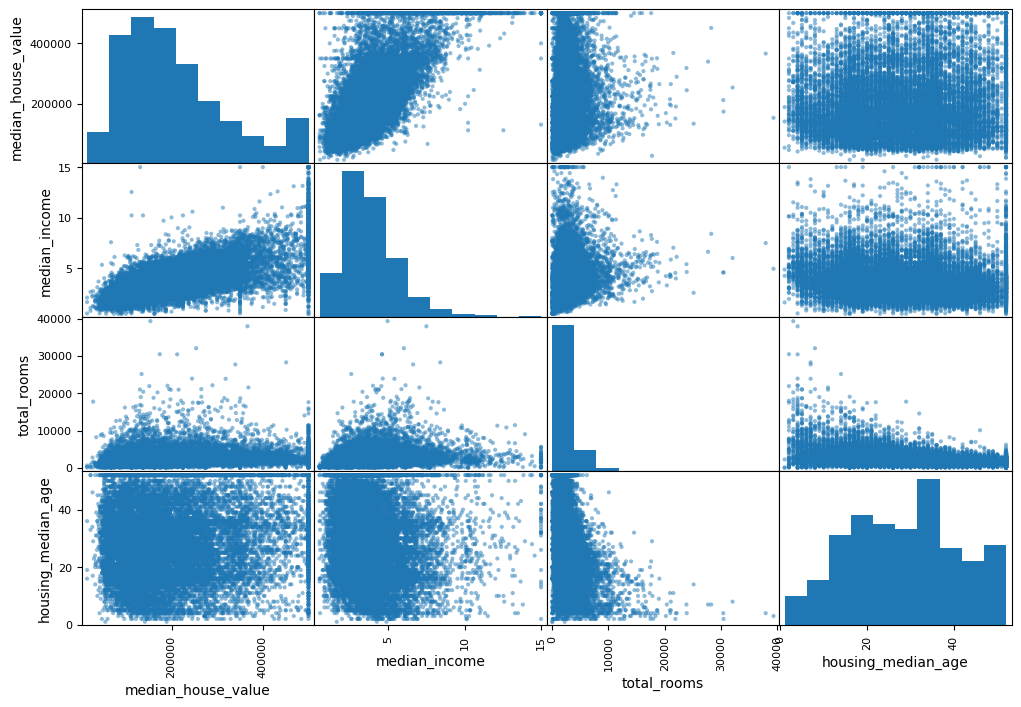

In [104]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(df_copy[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

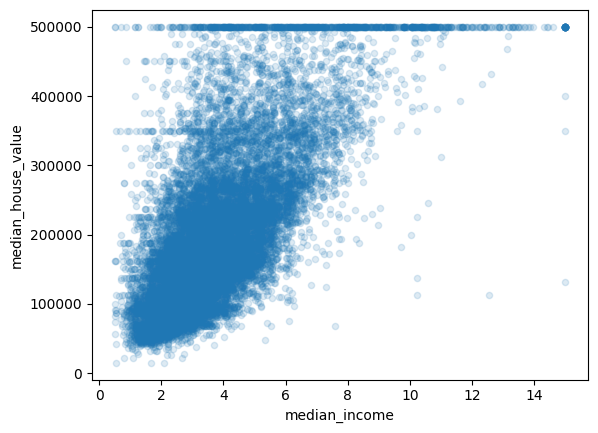

In [107]:
df_copy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.15)

Scatter Matrix will plot each column against each other
Other things noticed, firstly a price cap of 500000, then there are straight lines being drawn around 4.5, 3,5 and 2,8

In [109]:
df_copy["rooms_per_household"] = df_copy["total_rooms"]/df_copy["households"]
df_copy["bedrooms_per_room"] = df_copy["total_bedrooms"]/df_copy["total_rooms"]
df_copy["population_per_household"] = df_copy["population"]/df_copy["households"]

In [110]:
corr_matrix_att = df_copy.corr()
corr_matrix_att["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [111]:
type(corr_matrix_att)

pandas.core.frame.DataFrame

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <Axes: xlabel='population_per_household', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_income'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_income'>,
        <Axes: xlabel='population_per_household', ylabel='median_income'>],
       [<

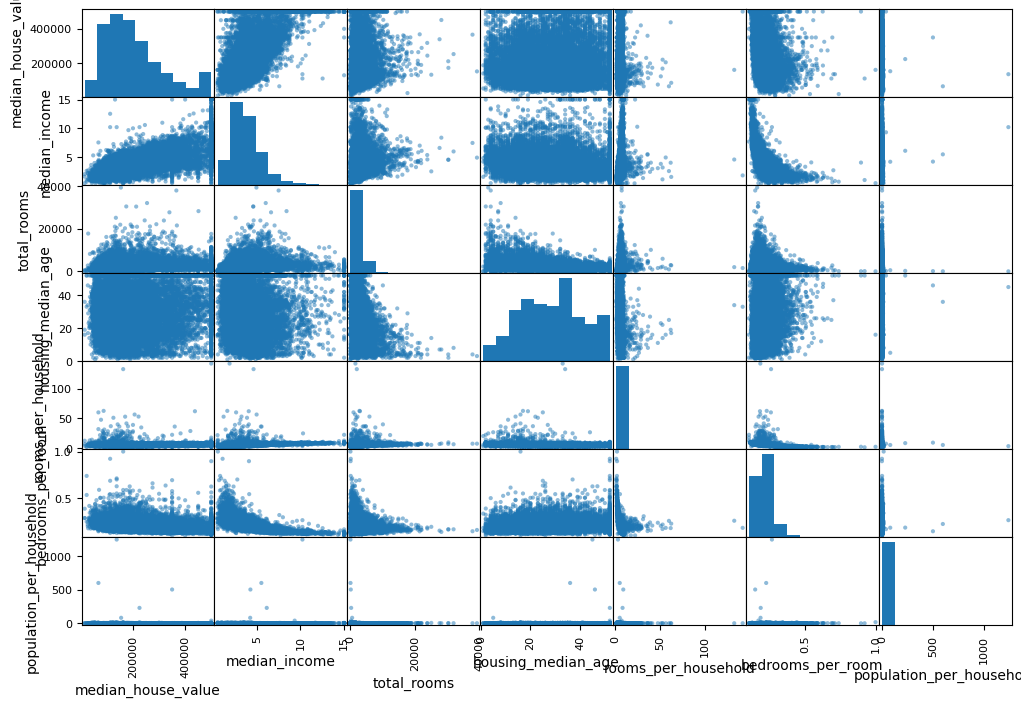

In [112]:
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age", "rooms_per_household", "bedrooms_per_room",
             "population_per_household"]
scatter_matrix(df_copy[attributes], figsize=(12,8))

Data Cleaning 

In [114]:
df_copy = strat_train_set.drop("median_house_value", axis=1)
df_labels = strat_train_set["median_house_value"].copy()

In [115]:
df.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [116]:
df.drop("total_bedrooms", axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [118]:
median = df["total_bedrooms"].median()

In [119]:
df["total_bedrooms"].fillna(median)

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

Creating a Imputer instance

In [123]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df_num = df.drop("ocean_proximity", axis=1)

In [124]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [125]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [126]:
df_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [127]:
X = imputer.transform(df_num)

In [131]:
import numpy as np

In [132]:
print(X)

[[-1.2146e+02  3.8520e+01  2.9000e+01 ...  2.2370e+03  7.0600e+02
   2.1736e+00]
 [-1.1723e+02  3.3090e+01  7.0000e+00 ...  2.0150e+03  7.6800e+02
   6.3373e+00]
 [-1.1904e+02  3.5370e+01  4.4000e+01 ...  6.6700e+02  3.0000e+02
   2.8750e+00]
 ...
 [-1.2272e+02  3.8440e+01  4.8000e+01 ...  4.5800e+02  1.7200e+02
   3.1797e+00]
 [-1.2270e+02  3.8310e+01  1.4000e+01 ...  1.2080e+03  5.0100e+02
   4.1964e+00]
 [-1.2214e+02  3.9970e+01  2.7000e+01 ...  6.2500e+02  1.9700e+02
   3.1319e+00]]


In [133]:
df_tr = pd.DataFrame(X, columns=df_num.columns)

In [134]:
df_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [135]:
imputer.strategy

'median'

In [136]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat = df["ocean_proximity"]
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [138]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [139]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_cat_1hot = encoder.fit_transform(df_cat_encoded.reshape(-1,1))

In [141]:
df_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [142]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
df_cat_1hot_2 = encoder.fit_transform(df_cat_encoded.reshape(-1,1))

In [144]:
df_cat_1hot_2

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Building Custom Transformers

In [153]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, 
            population_per_household]
            

In [154]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)

In [156]:
df_extra_attribs = attr_adder.transform(df_copy.values)

In [159]:
df_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

Transformation Pipeline. Data transformation steps to be executed in a sequential order

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])

In [182]:
df_num_tr = num_pipeline.fit_transform(df_num)

In [191]:
from sklearn.base import TransformerMixin 
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [192]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [193]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])


In [194]:
df_prepared = full_pipeline.fit_transform(df_copy)

In [195]:
df_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

Selecting and Training a model

In [196]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [198]:
type(lin_reg)

sklearn.linear_model._base.LinearRegression

In [199]:
some_data = df_copy.iloc[:5]

In [200]:
some_labels = df_labels.iloc[:5]

In [201]:
some_data_prepared = full_pipeline.transform(some_data)

In [202]:
print("Predictions: \t", lin_reg.predict(some_data_prepared))

Predictions: 	 [ 86208. 304704. 153536. 185728. 244416.]


In [203]:
print("Labels: \t", list(some_labels))

Labels: 	 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [204]:
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions) #L1 loss
lin_rmse = np.sqrt(lin_mse) #l2 loss
lin_rmse

68633.40810776998

In [205]:
lin_mse

4710544708.487706

lin_rmse predicted median housing value but not that accurately

Using another model DecisionTreeRegressor

In [206]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor()

In [207]:
df_predictions = tree_reg.predict(df_prepared)

In [209]:
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_mse

0.0

In [211]:
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Model is not perfect, it has been badly overfitted, and we need to get to a common point

Using Cross Validation to evaluate models

In [214]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10) #10 differnent folds
print("MSE Scores: \t",-scores)
rmse_scores = np.sqrt(-scores)
print("RMSE Scores: \t",rmse_scores)

MSE Scores: 	 [5.36619846e+09 5.18017019e+09 4.67062473e+09 5.32753952e+09
 4.85471870e+09 6.01057492e+09 4.96258266e+09 5.42385841e+09
 4.62079790e+09 4.96020090e+09]
RMSE Scores: 	 [73254.34089259 71973.39918746 68341.96902187 72989.99605238
 69675.81140894 77527.89769621 70445.60068085 73646.8492998
 67976.45108891 70428.69372963]


Trying out Ranom Forest Regressor

In [216]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)

RandomForestRegressor()

In [218]:
df_predictions = forest_reg.predict(df_prepared)

In [219]:
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_mse

352515238.99853283

In [220]:
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18775.389183676936

In [223]:
forest_scores = cross_val_score(
    forest_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10
)
forest_rmse_scores = np.sqrt(-forest_scores)
#display_scores(forest_rmse_scores)

In [224]:
forest_rmse_scores

array([51633.00034023, 48877.05250393, 47204.98635533, 51716.1526291 ,
       47566.04370843, 51342.82671505, 52634.70564456, 49968.48914505,
       48521.98862934, 53912.63818649])

In [226]:
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error')
grid_search.fit(df_prepared, df_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [227]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [228]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [230]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64342.36942701771 {'max_features': 2, 'n_estimators': 3}
55299.62104422145 {'max_features': 2, 'n_estimators': 10}
52699.417602760645 {'max_features': 2, 'n_estimators': 30}
60737.448397317654 {'max_features': 4, 'n_estimators': 3}
52557.07842603971 {'max_features': 4, 'n_estimators': 10}
50454.31051485784 {'max_features': 4, 'n_estimators': 30}
59295.70561892633 {'max_features': 6, 'n_estimators': 3}
51699.74348965119 {'max_features': 6, 'n_estimators': 10}
50251.50828836308 {'max_features': 6, 'n_estimators': 30}
59703.579248089976 {'max_features': 8, 'n_estimators': 3}
52078.55833051048 {'max_features': 8, 'n_estimators': 10}
50076.267624748056 {'max_features': 8, 'n_estimators': 30}
61547.91407427021 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54418.84710349767 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59537.44706019645 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52585.804113753074 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [231]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.72316300e-02, 5.85866677e-02, 4.31834203e-02, 1.56602932e-02,
       1.43701759e-02, 1.50709041e-02, 1.41230176e-02, 4.08945736e-01,
       4.37537139e-02, 1.15793120e-01, 4.67205913e-02, 4.04944791e-03,
       1.47006132e-01, 6.01589208e-05, 2.44548287e-03, 2.99950809e-03])

In [232]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [233]:
cat_one_hot_attribs = list(encoder.classes_)

In [234]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [236]:
sorted(zip(feature_importance, attributes), reverse=True)

[(0.4089457364339879, 'median_income'),
 (0.14700613181175015, 1),
 (0.1157931199615441, 'pop_per_hhold'),
 (0.06723162997843382, 'longitude'),
 (0.058586667700243074, 'latitude'),
 (0.046720591332435966, 'bedrooms_per_room'),
 (0.043753713893039385, 'rooms_per_hhold'),
 (0.04318342029808053, 'housing_median_age'),
 (0.015660293164072962, 'total_rooms'),
 (0.015070904062903023, 'population'),
 (0.014370175932854992, 'total_bedrooms'),
 (0.014123017642601531, 'households'),
 (0.00404944791063343, 0),
 (0.002999508089884495, 4),
 (0.0024454828667501123, 3),
 (6.015892078450341e-05, 2)]

Creating the Final Model

In [237]:
final_model = grid_search.best_estimator_

In [255]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [256]:
X_test_prepared = full_pipeline.transform(X_test)

In [257]:
final_prediction = final_model.predict(X_test_prepared)

In [258]:
final_prediction

array([477727.43333333, 226490.06666667, 215553.33333333, ...,
       360830.06666667, 264556.66666667, 218026.66666667])

In [259]:
y_test

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

In [261]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [262]:
final_mse

2333162811.9262023

In [263]:
final_rmse

48302.82405746275

Test Set being sent into the prediction model for testing

In [265]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN


In [266]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [267]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

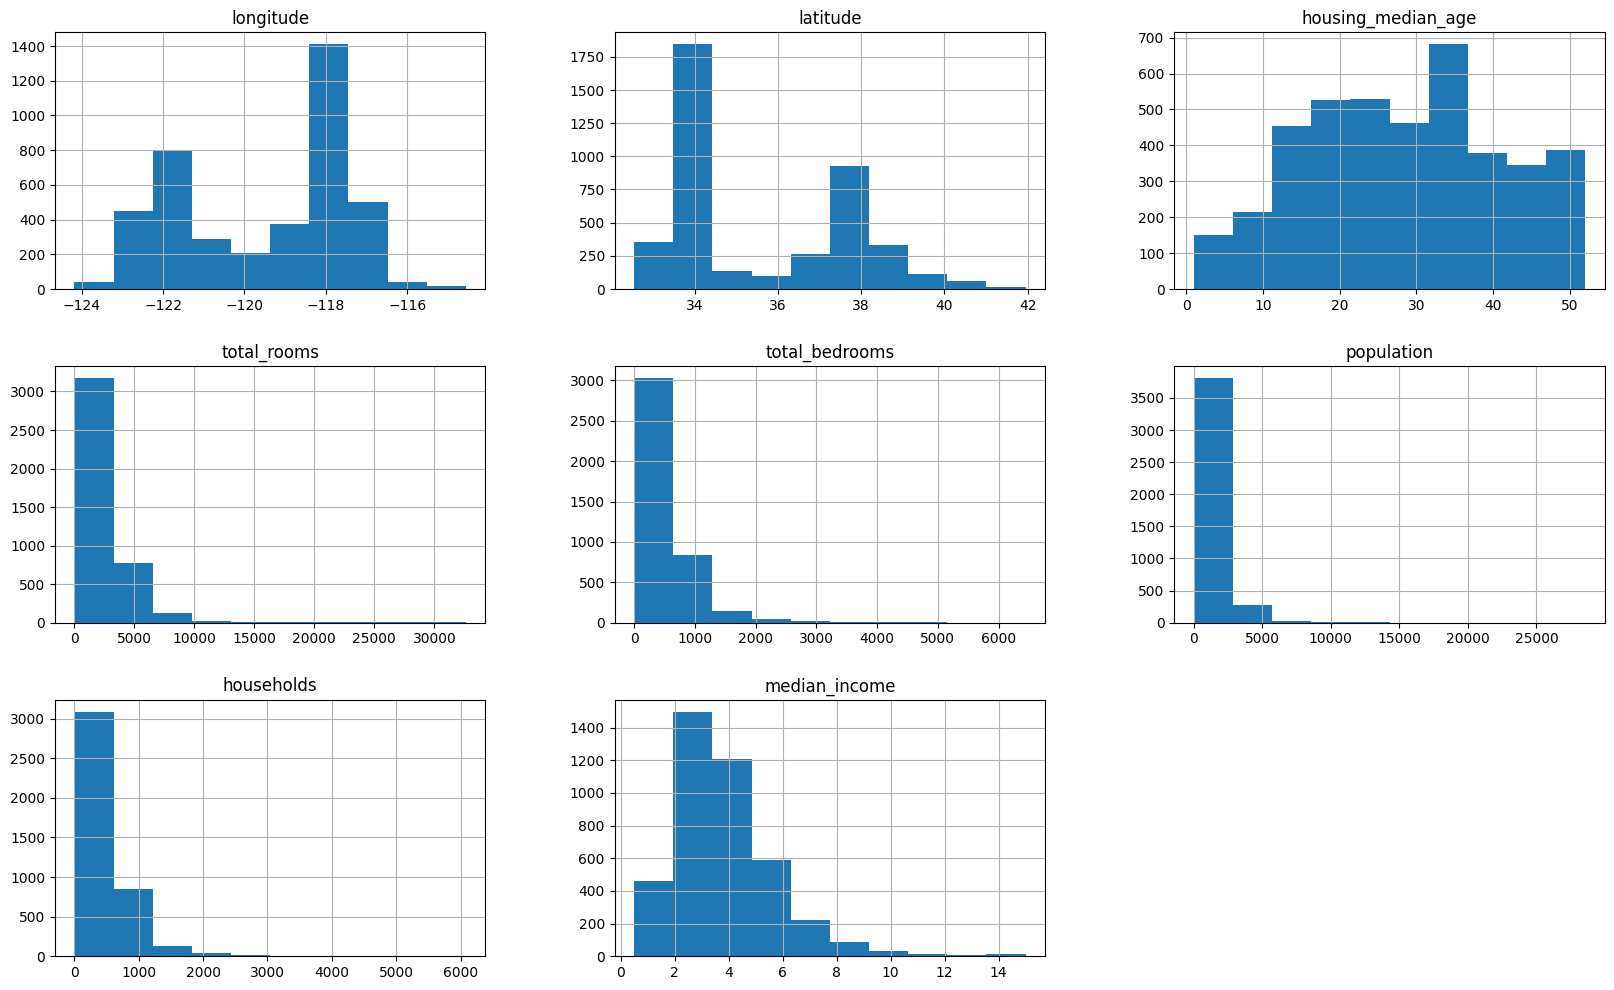

In [271]:
X_test.hist(figsize=(20,12))